c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


the prediction for this image is none_cat


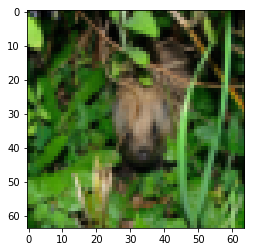

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import scipy 
%matplotlib inline

#import dataset
train_dataset = h5py.File("datasets/train_catvnoncat.h5")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y = np.array(train_dataset["train_set_y"][:])
test_dataset = h5py.File("datasets/test_catvnoncat.h5")
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y = np.array(test_dataset["test_set_y"][:])
#print(train_set_y)

#Show an example of a picture
index = 50
#plt.imshow(train_set_x_orig[index])

#Number of training example
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
m_pixel = train_set_x_orig.shape[1]


#Reshape matrices
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

#standardize matrices
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

#************************************************ Useful functions *******************************************************
#Sigmoid function
def sigmoid(x) :
    s = 1 / ( 1 + np.exp(-x))
    return s

#Initi function
def init(dim) :
    w = np.zeros((dim,1))
    b = 0
    return w,b

#propagation
def propagate(w,b,x,y) :
    # w n,1 / x n,m  / y 1,m
    m = x.shape[1]
    z = np.dot(w.T,x) + b
    a = sigmoid(z)  # 1,m
    j = -(np.dot(y, np.log(a.T)) + np.dot((1 - y), np.log((1 - a.T)))) / m
    dw = np.dot(x,(a - y).T)/m
    db = np.sum((a - y))/m
    grads = {
        "dw" : dw,
        "db" :db
    }
    return grads, j

def optimize(w,b,x,y, number_iteration, learning_rate) :
    costs = []
    for i in range(number_iteration) :
        grads, j = propagate(w,b,x,y)
        if i % 100 == 0 :
            costs.append(j)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
    params = {
        "w" : w,
        "b" : b
    }
    return params, grads, costs

def predict(w,b,predict) :
    prediction = np.dot(w.T,predict) + b
    prediction = sigmoid(prediction)
    prediction = prediction > 0.5 
    prediction = prediction.astype(int)
    return prediction

#************************************************ Model *******************************************************
def model(x_train,y_train, x_test, y_test, learning_rate, number_iteration) :
    #init
    w,b = init(x_train.shape[0])
    m_train = x_train.shape[1]
    m_test = x_test.shape[1]
    
    #train model
    params, grads, costs = optimize(w,b,x_train,y_train,number_iteration,learning_rate)
    w = params["w"]
    b = params["b"]
    
    # Train error
    y_train_predict = predict(w,b, x_train)
    error_train = 100 - (np.mean(np.abs(y_train_predict - y_train))) * 100 
    #test model
    y_test_predict =  predict(w,b, x_test)
    error_test = 100 - (np.mean(np.abs(y_test_predict - y_test))) * 100
                   
    #get Model
    d = {
        "w" : w,
        "b" : b,
        "costs" : costs,
        "train_error" : error_train,
        "test_error" : error_test,
        "learning_rate" : learning_rate,
        "number_iteration" : number_iteration
        
    }
    return d

#calculate model
d = model(train_set_x, train_set_y, test_set_x, test_set_y, 0.5, 4000)
classes = ["none_cat", "cat"]
#test an example of an image
index = np.random.randint(0, train_set_x.shape[1], 1)
image_test = train_set_x[:,index]
plt.imshow(image_test.reshape((m_pixel, m_pixel, 3)))
image_prediction = predict(d["w"], d["b"], image_test)
print("the prediction for this image is {}".format(classes[image_prediction[0][0]]))

